In [107]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [108]:
Airlines=pd.read_excel('C:\\Users\\vikra\\OneDrive\\Desktop\\Data scince assignment\\Assignment\\Clustering Assignment\\EastWestAirlines.xlsx',sheet_name='data')
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [109]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [110]:
Airlines.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [111]:
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [112]:
df_norm=minmax_func(Airlines.iloc[:,1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


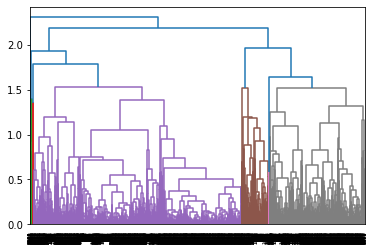

In [113]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

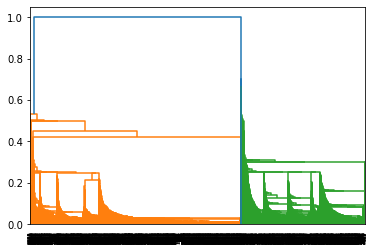

In [114]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

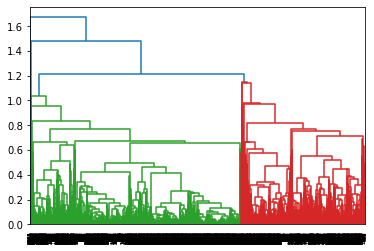

In [115]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [116]:
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')
hc 

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [117]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [118]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,1
...,...
3994,0
3995,0
3996,0
3997,2


In [119]:
Clusters.value_counts()

Clusters
2           2491
0           1144
1            325
4             31
3              4
5              4
dtype: int64

In [120]:
Airlines['h_clusterid']=Clusters
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [121]:
Airlines.groupby(["h_clusterid"])["ID#"].apply(lambda x:tuple(x))

h_clusterid
0    (8, 9, 10, 18, 19, 20, 22, 29, 30, 37, 39, 40,...
1    (5, 12, 16, 17, 21, 36, 42, 53, 81, 82, 88, 95...
2    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
3                             (2032, 3257, 3606, 3617)
4    (202, 386, 804, 951, 1161, 1283, 1403, 1542, 1...
5                               (109, 915, 2977, 3361)
Name: ID#, dtype: object

In [122]:
Airlines.groupby('h_clusterid').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,,
0,1923.643357,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
1,1106.516923,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,2170.104777,59961.123244,88.551987,1.712967,1.000401,1.006022,10170.362505,9.095143,227.239663,0.653553,3824.722601,0.000000
3,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,2302.967742,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548
5,1840.500000,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.500000


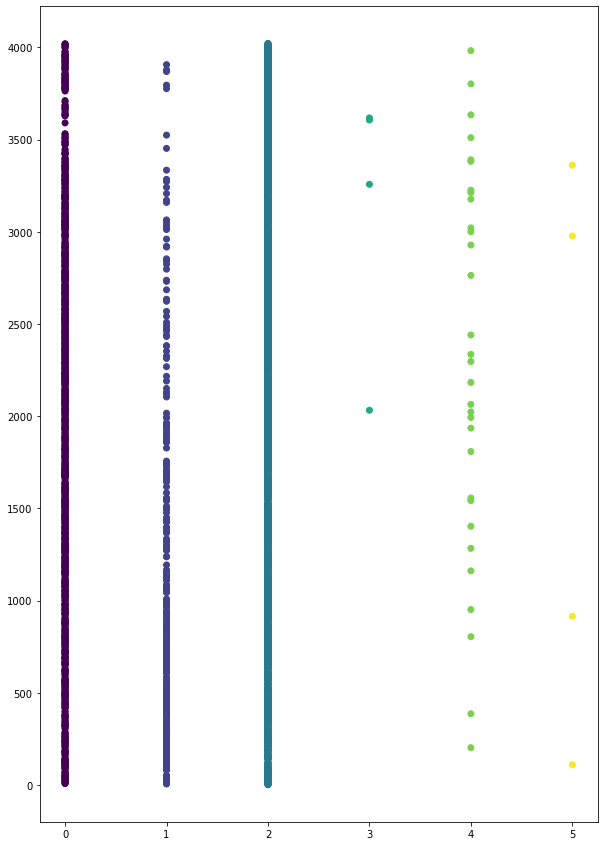

In [123]:
plt.figure(figsize=(10, 15))  
plt.scatter(Airlines['h_clusterid'],Airlines['ID#'], c=hc.labels_) 

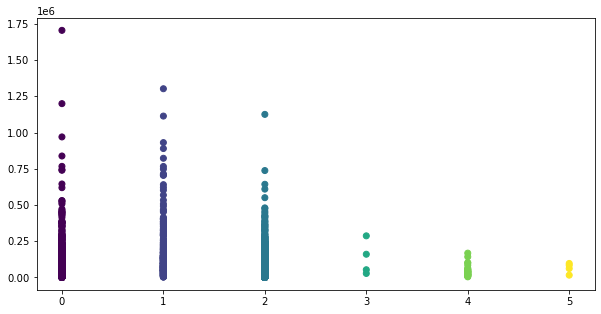

In [124]:
plt.figure(figsize=(10, 5))  
plt.scatter(Airlines['h_clusterid'],Airlines['Balance'], c=hc.labels_) 

# ======================================================

# Kmeans

In [125]:
Airlines1=pd.read_excel('C:\\Users\\vikra\\OneDrive\\Desktop\\Data scince assignment\\Assignment\\Clustering Assignment\\EastWestAirlines.xlsx',sheet_name='data')
Airlines1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [126]:
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [127]:
df_norm2=minmax_func(Airlines1.iloc[:,1:])
df_norm2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


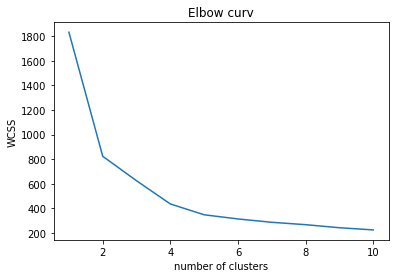

In [128]:
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(df_norm2)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [129]:
Kmean_cluster=KMeans(n_clusters=3,random_state=0)
Kmean_cluster.fit(df_norm2)
Kmean_cluster.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [130]:
cluster=pd.Series(Kmean_cluster.labels_)
Airlines1["Kmean_clust"]=cluster
Airlines1.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmean_clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1


In [131]:
Kmean_cluster.cluster_centers_

array([[ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -4.44089210e-16],
       [ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00],
       [ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01,  3.27515792e-15]])

In [132]:
Airlines1.groupby('Kmean_clust').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Kmean_clust,,,,,,,,,,,,
0,1833.460548,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0
1,1745.592843,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
2,2284.375857,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0


# ============================================================

# DBSCAN

In [133]:
Airlines2=pd.read_excel('C:\\Users\\vikra\\OneDrive\\Desktop\\Data scince assignment\\Assignment\\Clustering Assignment\\EastWestAirlines.xlsx',sheet_name='data')
Airlines2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [135]:
Airlines2.drop(['ID#'],axis = 1, inplace = True)

In [136]:
array=Airlines2.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [137]:
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [138]:
dbscan = DBSCAN(eps =0.8, min_samples = 6)
dbscan.fit(x)

DBSCAN(eps=0.8, min_samples=6)

In [139]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [140]:
Clust= pd.DataFrame(dbscan.labels_,columns=['cluster'])
Clust

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [141]:
Airlines2['dbscan_clust']=Clust

In [142]:
Airlines2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbscan_clust
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [143]:
Airlines2['dbscan_clust'].value_counts()

 0    2216
 1     944
-1     820
 2      12
 3       7
Name: dbscan_clust, dtype: int64

In [144]:
metrics.silhouette_score(x, dbscan.labels_)   

0.16002351310807247

In [145]:
def dbscan(X,eps,min_samples):
    ss=StandardScaler()
    X=ss.fit_transform(X)
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(X)
    y_pred=db.fit_predict(X)
    plt.scatter(X[:,0],X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

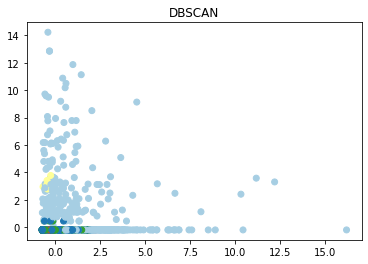

In [146]:
dbscan(array,0.8,5)

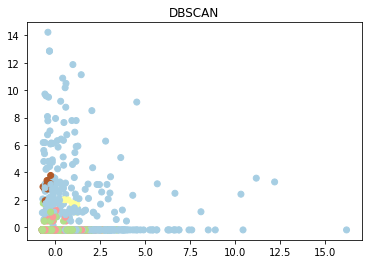

In [147]:
dbscan(array,1,5)

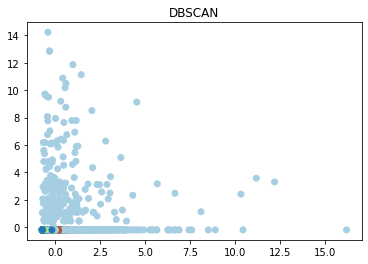

In [148]:
dbscan(array,0.5,8)